# Kuramoto Model

時間発展は
\begin{align}
    \dot{\theta}_i = \omega_i + \cfrac{J}{N} \sum_{j=1}^N \sin (\theta_i-\theta_j)
\end{align}

秩序変数は
\begin{align}
    r = \left| \cfrac{1}{N} \sum_{j=1}^N e^{i\theta_j} \right|
\end{align}

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;

In [47]:
def calc_norm (N,J,dt,t_len,mu=0,sigma=1):
    thetai = np.zeros ((N,t_len));
    
    thetai[:,0] = 2*np.pi*np.random.rand (N);
    
    for idx in range (t_len-1):
        #omega = sigma*np.random.randn(N,1) - mu;
        #omega = 0.;
        omega = 10.;
        dth = thetai[:,idx].reshape ((1,N)) - thetai[:,idx].reshape ((N,1));
        dthetai = (omega + J/N*np.sin(dth).dot(np.ones((N,1)))) * dt;
        thetai[:,idx+1] = thetai[:,idx].reshape ((N,)) + dthetai.reshape((N,));
    return thetai;

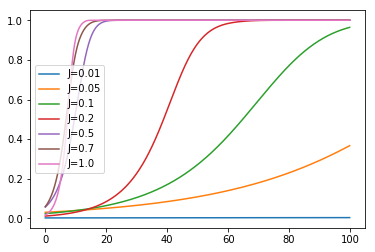

In [49]:
N = 1000;
#J = 0.5;
dt = 0.1;
Tmax = 100;

for J in [0.01,0.05,0.1,0.2,0.5,0.7,1.0]:
    Ts = np.arange (0,Tmax,dt);
    thetai = calc_norm (N,J,dt,len(Ts));
    r = np.abs (np.mean (np.exp (1j*thetai),axis=0))
    plt.plot (Ts,r,label="J="+str(J));

plt.legend ()

In [43]:
def calc_norm_pump (N,J,dt,t_len,ps,mu=0,sigma=1):
    thetai = np.zeros ((N,t_len));
    
    thetai[:,0] = 2*np.pi*np.random.rand (N);
    
    for idx in range (t_len-1):
        #omega = sigma*np.random.randn(N,1) - mu;
        #omega = 0.;
        omega = 1.;
        dth = thetai[:,idx].reshape ((1,N)) - thetai[:,idx].reshape ((N,1));
        dthetai = (-omega+ps[idx] + J/N*np.sin(dth).dot(np.ones((N,1)))) * dt;
        thetai[:,idx+1] = thetai[:,idx].reshape ((N,)) + dthetai.reshape((N,));
    return thetai;

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
No handles with labels found to put in legend.


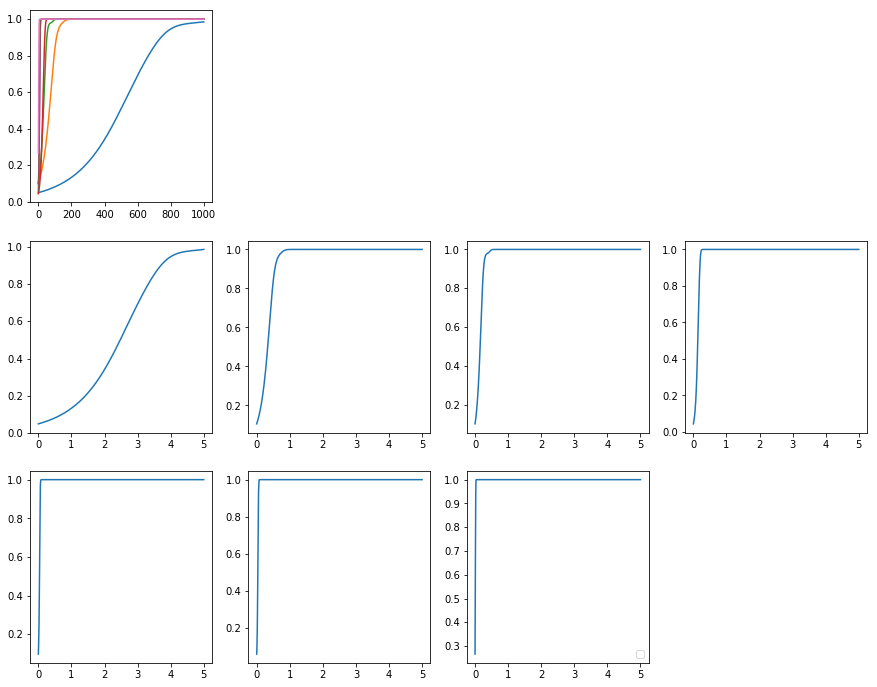

In [46]:
N = 100;
#J = 0.5;
dt = 0.1;
Tmax = 1000;
Ts = np.arange (0,Tmax,dt);
ps = Ts / Tmax * 5;

plt.figure (figsize=(15,12));
idx = 1;
for J in [0.01,0.05,0.1,0.2,0.5,0.7,1.0]:
    thetai = calc_norm_pump (N,J,dt,len(Ts),ps);
    r = np.abs (np.mean (np.exp (1j*thetai),axis=0))
    plt.subplot (3,4,1)
    plt.plot (Ts,r,label="J="+str(J));
    plt.subplot (3,4,4+idx);
    plt.plot (ps,r);
    idx = idx + 1;

plt.legend ()